In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('garments_worker_productivity.csv')
dataset_original = dataset.copy()
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [2]:
dataset["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [3]:
dataset["department"].replace('finishing ','finishing',inplace = True)

In [4]:
dataset["department"].unique()

array(['sweing', 'finishing'], dtype=object)

In [5]:
labelencoder = LabelEncoder()
dataset['quarter'] = labelencoder.fit_transform(dataset['quarter'])

dataset['day']=labelencoder.fit_transform(dataset['day'])

dataset['department']= labelencoder.fit_transform(dataset['department'])

dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,0,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   int32  
 2   department             1197 non-null   int32  
 3   day                    1197 non-null   int32  
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
dataset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
dataset['wip'].fillna(value=dataset['wip'].mean() , inplace=True)


In [9]:
dataset.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [10]:
dataset.head(20)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,1,3,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,0,3,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,1,3,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,1,3,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,1,3,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,0,1,3,7,0.80,25.90,984.000000,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,0,0,3,2,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,0,1,3,3,0.75,28.08,795.000000,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,0,1,3,2,0.75,19.87,733.000000,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,0,1,3,1,0.75,28.08,681.000000,6900,45,0.0,0,0,57.5,0.750428


In [11]:
dataset=dataset.drop( 'date',axis=1 )


In [12]:
dataset.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,0,0,3,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,0,1,3,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,0,1,3,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,0,1,3,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


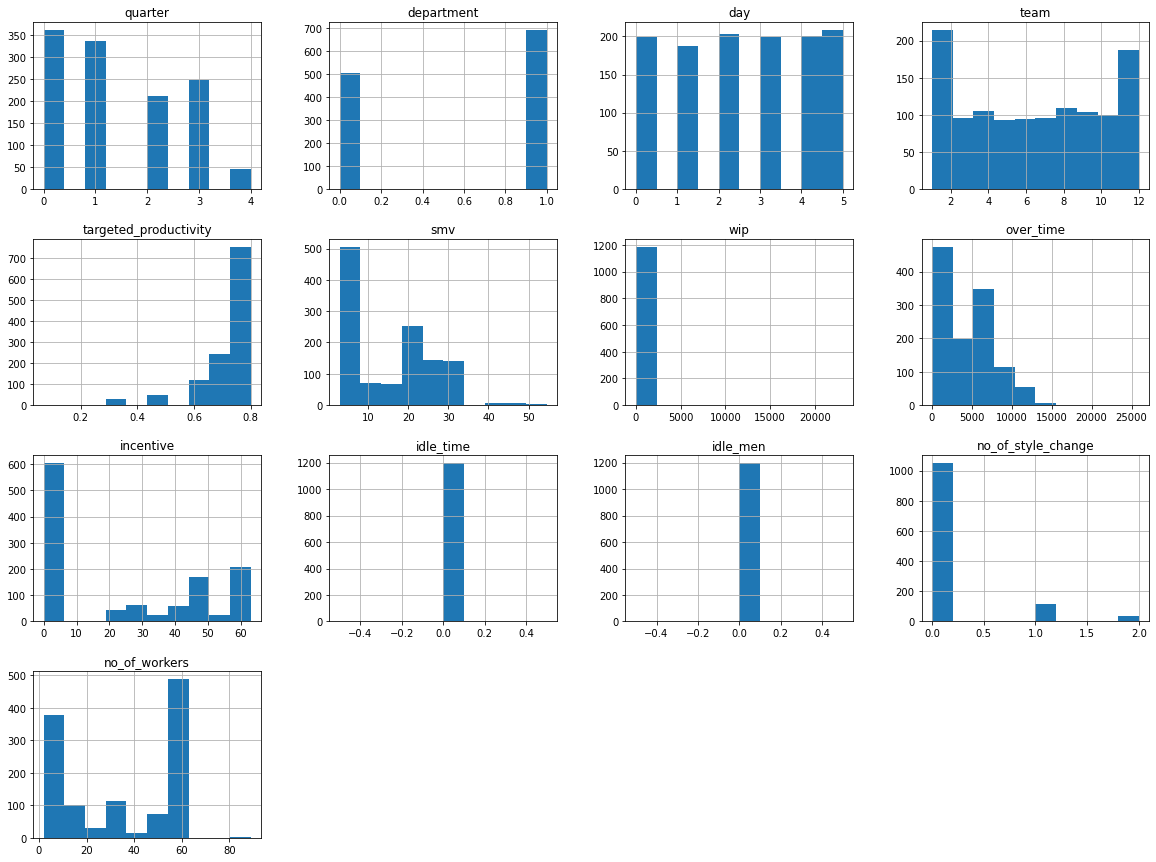

In [31]:
import matplotlib.pyplot as plt
dataset.hist(bins=10,figsize=(20,15))
plt.show()

In [14]:
print (dataset['incentive'].quantile(0.10))
print (dataset['incentive'].quantile(0.90))

0.0
63.0


In [15]:
print(dataset['incentive'].skew())
dataset["incentive"]=np.where(dataset["incentive"]<0.0,0.0,dataset['incentive'])
dataset["incentive"]=np.where(dataset["incentive"]>63.0,63.0,dataset['incentive'])
print(dataset['incentive'].skew())

15.790746016958247
0.3549744433565577


In [16]:
print (dataset['idle_time'].quantile(0.10))
print (dataset['idle_time'].quantile(0.90))

0.0
0.0


In [17]:
print(dataset['idle_time'].skew())
dataset["idle_time"]=np.where(dataset["idle_time"]<0.0,0.0,dataset['idle_time'])
dataset["idle_time"]=np.where(dataset["idle_time"]>0.0,0.0,dataset['idle_time'])
print(dataset['idle_time'].skew())

20.545425229670172
0


In [18]:
print (dataset['idle_men'].quantile(0.10))
print (dataset['idle_men'].quantile(0.90))


0.0
0.0


In [19]:
print(dataset['idle_men'].skew())
dataset["idle_men"]=np.where(dataset["idle_men"]<0.0,0.0,dataset['idle_men'])
dataset["idle_men"]=np.where(dataset["idle_men"]>0.0,0.0,dataset['idle_men'])
print(dataset['idle_men'].skew())

9.855079123524012
0


In [20]:
dataset.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [21]:
dataset.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108.000000,7080,63.0,0.0,0.0,0,59.0,0.940725
1,0,0,3,1,0.75,3.94,1190.465991,960,0.0,0.0,0.0,0,8.0,0.886500
2,0,1,3,11,0.80,11.41,968.000000,3660,50.0,0.0,0.0,0,30.5,0.800570
3,0,1,3,12,0.80,11.41,968.000000,3660,50.0,0.0,0.0,0,30.5,0.800570
4,0,1,3,6,0.80,25.90,1170.000000,1920,50.0,0.0,0.0,0,56.0,0.800382


In [22]:
dataset_labels=dataset["actual_productivity"]
dataset = dataset.drop("actual_productivity",axis=1)
dataset.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,1,3,8,0.80,26.16,1108.000000,7080,63.0,0.0,0.0,0,59.0
1,0,0,3,1,0.75,3.94,1190.465991,960,0.0,0.0,0.0,0,8.0
2,0,1,3,11,0.80,11.41,968.000000,3660,50.0,0.0,0.0,0,30.5
3,0,1,3,12,0.80,11.41,968.000000,3660,50.0,0.0,0.0,0,30.5
4,0,1,3,6,0.80,25.90,1170.000000,1920,50.0,0.0,0.0,0,56.0


In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset,test_size=0.2)
train_labels, test_labels = train_test_split(dataset_labels,test_size=0.2)
print (len(train_set),"train + ",len(test_set),"test")



957 train +  240 test


In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set,train_labels)

LinearRegression()

In [25]:
from sklearn.metrics import mean_absolute_error
dataset_predictions = lin_reg.predict(test_set)
lin_mea = mean_absolute_error(test_labels,dataset_predictions)
lin_mea

0.1341246975746734